In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from statistics import mean 

In [3]:
df = pd.read_csv("analyte_data.csv")

In [4]:
df.head()

,analyte,lab,age,lower_limit,upper_limit
0,alanine,benioff,child,200.0,450.0
1,alanine,benioff,adult,230.0,510.0
2,Alpha-aminoadipic acid,benioff,child,NaN,NaN
3,Alpha-aminoadipic acid,benioff,adult,NaN,NaN
4,Alpha-amino-N-butyric acid,benioff,child,8.0,37.0


In [5]:
print("age: ", df['age'].unique())
print("lab: ", df['lab'].unique())
print("analyte: ", df['analyte'].unique())

age:  ['child' 'adult']
lab:  ['benioff' 'mayo' 'mayo ' 'labcorp']
analyte:  ['alanine' 'Alpha-aminoadipic acid' 'Alpha-amino-N-butyric acid'
 'Arginine' 'Asparagine' 'Aspartic acid' 'Beta-alanine'
 'Beta-amino-isobutyric acid' 'Carnosine' 'Citrulline' 'Cystine'
 'Glutamic acid' 'Glutamine' 'Glycine' 'Histidine' 'Hydroxyproline'
 'Isoleucine' 'Leucine' 'Lysine' 'Methionine' '1-methylhistidine'
 '3-methylhistidine' 'Ornithine' 'Phenylalanine' 'Phosphoserine'
 'Phosphoethanolamine' 'Proline' 'Serine' 'Taurine' 'Threonine' 'Tyrosine'
 'Valine' 'ethanolamine' 'Sarcosine' 'Argininosuccinic Acid' 'Anserine'
 'Homocitruline' 'g-Amino-n-butyric Acid' 'Beta-Aminoisobutyric Acid'
 'Hydroxylysine' 'Cystathionine' 'Tryptophan' 'Alloisoleucine'
 'Homocystine']


In [8]:
print(df[df['lab']=='mayo '])
df = df.replace(['mayo '],'mayo')
print("lab: ", df['lab'].unique())

          analyte    lab    age  lower_limit  upper_limit
150  ethanolamine  mayo   child          0.0         70.0
151  ethanolamine  mayo   adult          0.0         67.0
lab:  ['benioff' 'mayo' 'labcorp']


In [11]:
temp_data = df.loc[:,['lower_limit','upper_limit']]
print(temp_data)

     lower_limit  upper_limit
0          200.0        450.0
1          230.0        510.0
2            NaN          NaN
3            NaN          NaN
4            8.0         37.0
..           ...          ...
259          NaN          NaN
260          NaN          NaN
261          NaN          NaN
262          0.4          3.0
263          0.1          0.8

[264 rows x 2 columns]


In [12]:
df['range'] = temp_data.values.tolist()
print(df['range'])

0      [200.0, 450.0]
1      [230.0, 510.0]
2          [nan, nan]
3          [nan, nan]
4         [8.0, 37.0]
            ...      
259        [nan, nan]
260        [nan, nan]
261        [nan, nan]
262        [0.4, 3.0]
263        [0.1, 0.8]
Name: range, Length: 264, dtype: object


In [16]:
df['range'].iloc[0:1][0][1]

450.0

In [24]:
df_grp = df.groupby(['lab'], dropna=True).mean()

In [25]:
print(df_grp)

         lower_limit  upper_limit
lab                              
benioff    63.181818   147.800000
labcorp    39.568182   158.780303
mayo       33.255814   119.069767


In [19]:
df_grp[]

In [26]:
child_df = df[df['age']=='child']
adult_df = df[df['age']=='adult']

child_df_mayo = child_df[child_df['lab']=='mayo']
child_df_benioff = child_df[child_df['lab']=='benioff']
child_df_labcorp = child_df[child_df['lab']=='labcorp']
adult_df_mayo = adult_df[adult_df['lab']=='mayo']
adult_df_benioff = adult_df[adult_df['lab']=='benioff']
adult_df_labcorp = adult_df[adult_df['lab']=='labcorp']
print(adult_df_labcorp)

                        analyte      lab    age  lower_limit  upper_limit  \
173                     alanine  labcorp  adult        124.8        564.2   
175      Alpha-aminoadipic acid  labcorp  adult          0.0          2.2   
177  Alpha-amino-N-butyric acid  labcorp  adult          5.4         34.5   
179                    Arginine  labcorp  adult         32.0        150.0   
181                  Asparagine  labcorp  adult         29.5         84.5   
183               Aspartic acid  labcorp  adult          0.9          7.4   
185                Beta-alanine  labcorp  adult          1.1          9.0   
187  Beta-amino-isobutyric acid  labcorp  adult          NaN          NaN   
189                   Carnosine  labcorp  adult          NaN          NaN   
191                  Citrulline  labcorp  adult         13.7         63.2   
193                     Cystine  labcorp  adult         13.5         60.2   
195               Glutamic acid  labcorp  adult         18.1        155.9   

In [32]:
min_child_mayo = child_df_mayo['lower_limit'].tolist() 
min_child_benioff =child_df_benioff['lower_limit'].tolist() 
min_child_labcorp =child_df_labcorp['lower_limit'].tolist()
min_adult_mayo = adult_df_mayo['lower_limit'].tolist() 
min_adult_benioff =adult_df_benioff['lower_limit'].tolist() 
min_adult_labcorp =adult_df_labcorp['lower_limit'].tolist()

In [33]:
max_child_mayo = child_df_mayo['upper_limit'].tolist() 
max_child_benioff =child_df_benioff['upper_limit'].tolist() 
max_child_labcorp =child_df_labcorp['upper_limit'].tolist()
max_adult_mayo = adult_df_mayo['upper_limit'].tolist() 
max_adult_benioff =adult_df_benioff['upper_limit'].tolist() 
max_adult_labcorp =adult_df_labcorp['upper_limit'].tolist()

[139.0, 0.0, 7.0, 29.0, 25.0, 2.0, 0.0, 0.0, 0.0, 9.0, 2.0, 31.0, 316.0, 111.0, 10.0, 8.0, 31.0, 48.0, 49.0, 11.0, 0.0, 0.0, 20.0, 28.0, 0.0, 0.0, 85.0, 69.0, 37.0, 47.0, 26.0, 83.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.0, 0.0, nan]


Text(0.5, 1.0, 'Child Values')

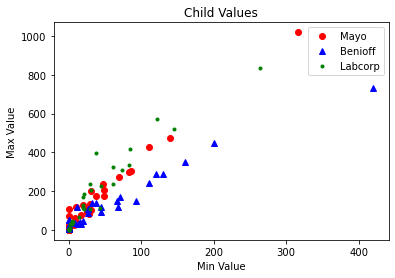

In [35]:
plt.plot(min_child_mayo, max_child_mayo, 'o', color='r', label='Mayo')
plt.plot(min_child_benioff, max_child_benioff, '^', color='b', label='Benioff')
plt.plot(min_child_labcorp, max_child_labcorp, '.', color='g', label='Labcorp')
plt.legend()
plt.xlabel('Min Value')
plt.ylabel('Max Value')
plt.title("Child Values")

Text(0.5, 1.0, 'Adult Values')

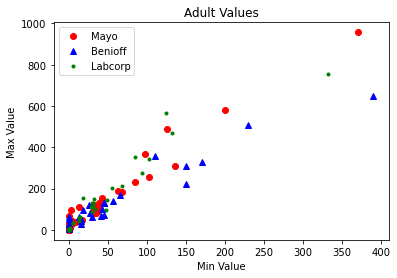

In [36]:
plt.plot(min_adult_mayo, max_adult_mayo, 'o', color='r', label='Mayo')
plt.plot(min_adult_benioff, max_adult_benioff, '^', color='b', label='Benioff')
plt.plot(min_adult_labcorp, max_adult_labcorp, '.', color='g', label='Labcorp')
plt.legend()
plt.xlabel('Min Value')
plt.ylabel('Max Value')
plt.title("Adult Values")

<AxesSubplot:>

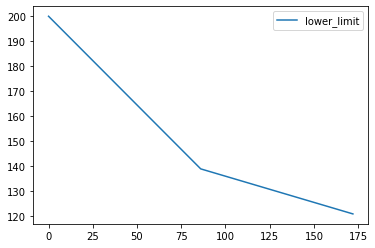

In [37]:
child_df[child_df['analyte']=='alanine'].loc[:,['analyte','lower_limit']].plot()

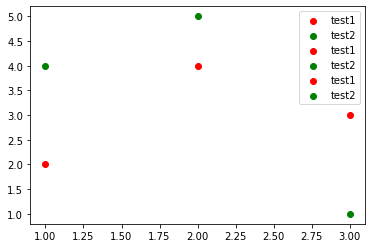

In [38]:
plt.scatter(1,2, color = 'r', label = 'test1')
plt.scatter(1,4, color = 'g', label = 'test2')
plt.scatter(2,4, color = 'r', label = 'test1')
plt.scatter(2,5, color = 'g', label = 'test2')
plt.scatter(3,3, color = 'r', label = 'test1')
plt.scatter(3,1, color = 'g', label = 'test2')
plt.legend()

In [39]:
print(len(df['analyte'].unique()))

44


[Text(0, 0, 'alanine'),
 Text(1, 0, 'Alpha-aminoadipic acid'),
 Text(2, 0, 'Alpha-amino-N-butyric acid'),
 Text(3, 0, 'Arginine'),
 Text(4, 0, 'Asparagine'),
 Text(5, 0, 'Aspartic acid'),
 Text(6, 0, 'Beta-alanine'),
 Text(7, 0, 'Beta-amino-isobutyric acid'),
 Text(8, 0, 'Carnosine'),
 Text(9, 0, 'Citrulline'),
 Text(10, 0, 'Cystine'),
 Text(11, 0, 'Glutamic acid'),
 Text(12, 0, 'Glutamine'),
 Text(13, 0, 'Glycine'),
 Text(14, 0, 'Histidine'),
 Text(15, 0, 'Hydroxyproline'),
 Text(16, 0, 'Isoleucine'),
 Text(17, 0, 'Leucine'),
 Text(18, 0, 'Lysine'),
 Text(19, 0, 'Methionine'),
 Text(20, 0, '1-methylhistidine'),
 Text(21, 0, '3-methylhistidine'),
 Text(22, 0, 'Ornithine'),
 Text(23, 0, 'Phenylalanine'),
 Text(24, 0, 'Phosphoserine'),
 Text(25, 0, 'Phosphoethanolamine'),
 Text(26, 0, 'Proline'),
 Text(27, 0, 'Serine'),
 Text(28, 0, 'Taurine'),
 Text(29, 0, 'Threonine'),
 Text(30, 0, 'Tyrosine'),
 Text(31, 0, 'Valine'),
 Text(32, 0, 'ethanolamine'),
 Text(33, 0, 'Sarcosine'),
 Text(34, 0

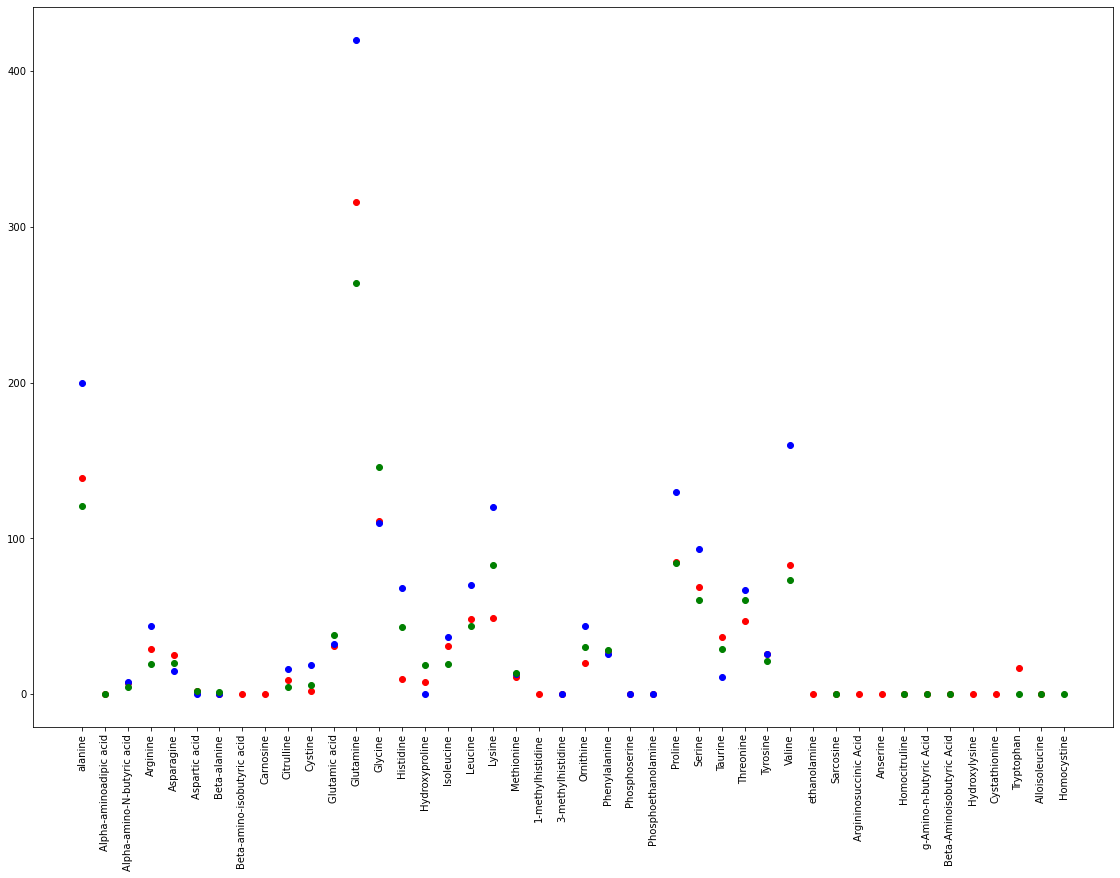

In [88]:
value_range = list(range(44))
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])
ax.scatter(value_range,min_child_mayo, color='r', label='Mayo')
ax.scatter(value_range,min_child_benioff, color='b', label='Benioff')
ax.scatter(value_range,min_child_labcorp, color='g', label='Labcorp')
ax.set_xticks(value_range)
ax.set_xticklabels(list(df['analyte'].unique()), rotation= 'vertical')

[Text(0, 0, 'alanine'),
 Text(1, 0, 'Alpha-aminoadipic acid'),
 Text(2, 0, 'Alpha-amino-N-butyric acid'),
 Text(3, 0, 'Arginine'),
 Text(4, 0, 'Asparagine'),
 Text(5, 0, 'Aspartic acid'),
 Text(6, 0, 'Beta-alanine'),
 Text(7, 0, 'Beta-amino-isobutyric acid'),
 Text(8, 0, 'Carnosine'),
 Text(9, 0, 'Citrulline'),
 Text(10, 0, 'Cystine'),
 Text(11, 0, 'Glutamic acid'),
 Text(12, 0, 'Glutamine'),
 Text(13, 0, 'Glycine'),
 Text(14, 0, 'Histidine'),
 Text(15, 0, 'Hydroxyproline'),
 Text(16, 0, 'Isoleucine'),
 Text(17, 0, 'Leucine'),
 Text(18, 0, 'Lysine'),
 Text(19, 0, 'Methionine'),
 Text(20, 0, '1-methylhistidine'),
 Text(21, 0, '3-methylhistidine'),
 Text(22, 0, 'Ornithine'),
 Text(23, 0, 'Phenylalanine'),
 Text(24, 0, 'Phosphoserine'),
 Text(25, 0, 'Phosphoethanolamine'),
 Text(26, 0, 'Proline'),
 Text(27, 0, 'Serine'),
 Text(28, 0, 'Taurine'),
 Text(29, 0, 'Threonine'),
 Text(30, 0, 'Tyrosine'),
 Text(31, 0, 'Valine'),
 Text(32, 0, 'ethanolamine'),
 Text(33, 0, 'Sarcosine'),
 Text(34, 0

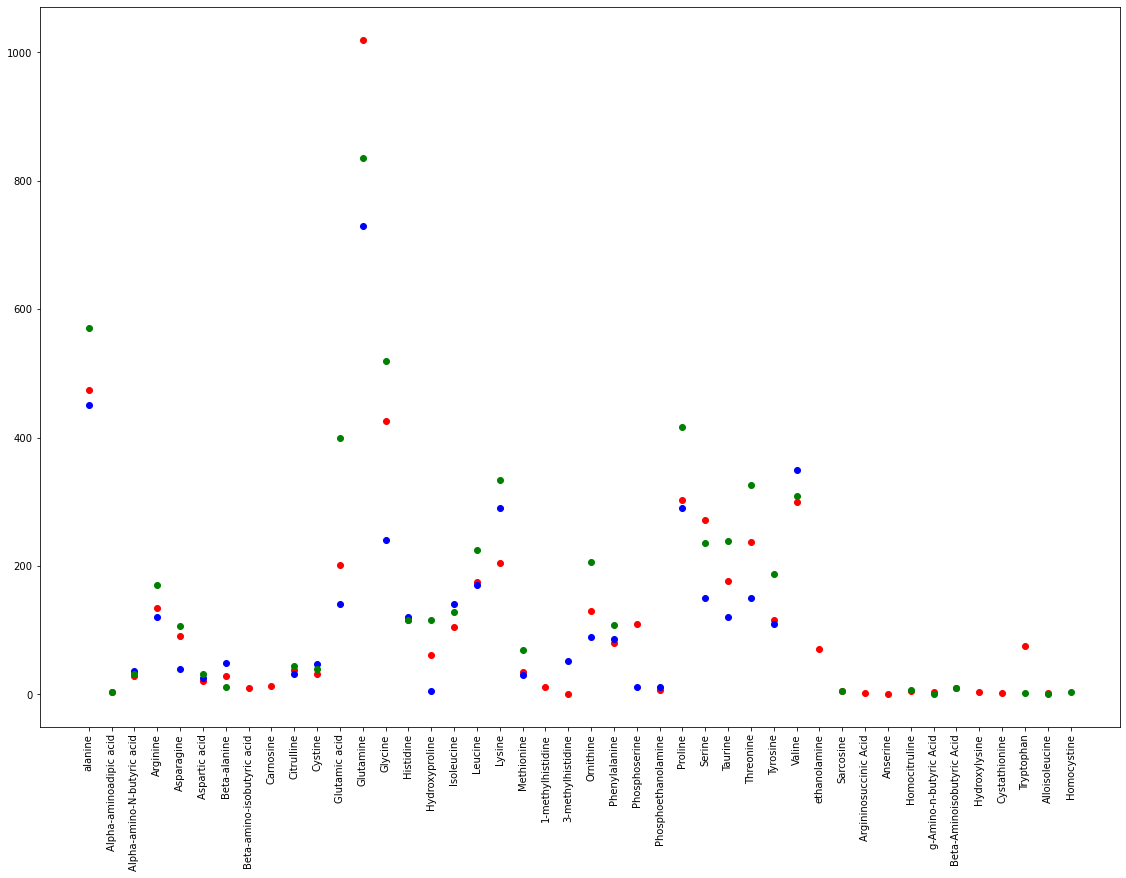

In [45]:
value_range = list(range(44))
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])
ax.scatter(value_range,max_child_mayo, color='r', label='Mayo')
ax.scatter(value_range,max_child_benioff, color='b', label='Benioff')
ax.scatter(value_range,max_child_labcorp, color='g', label='Labcorp')
ax.set_xticks(value_range)
ax.set_xticklabels(list(df['analyte'].unique()), rotation= 'vertical')

In [55]:
ratio_mayo_benioff = []
ratio_mayo_labcorp = []
ratio_benioff_labcorp = []
for i in range(len(min_child_mayo)):
    if 0 not in [min_child_mayo[i],min_child_benioff[i]]:
        x = min_child_mayo[i]/min_child_benioff[i]
        ratio_mayo_benioff += [x]
        print(x)
    else:
        if 0 != min_child_benioff[i]:
            x =min_child_mayo[i]/min_child_benioff[i]
            ratio_mayo_benioff += [x]
        elif 0 != min_child_mayo[i]:
            x = (-1)*min_child_benioff[i]/min_child_mayo[i]
            ratio_mayo_benioff += [x]
        else:
            ratio_mayo_benioff +=[0]
            

0.695
0.875
0.6590909090909091
1.6666666666666667
0.5625
0.10526315789473684
0.96875
0.7523809523809524
1.009090909090909
0.14705882352941177
0.8378378378378378
0.6857142857142857
0.4083333333333333
0.8461538461538461
0.45454545454545453
1.0769230769230769
0.6538461538461539
0.7419354838709677
3.3636363636363638
0.7014925373134329
1.0
0.51875
nan
nan


In [57]:
for i in range(len(min_child_mayo)):
    if 0 not in [min_child_mayo[i],min_child_labcorp[i]]:
        x = min_child_mayo[i]/min_child_labcorp[i]
        ratio_mayo_labcorp += [x]
        print(x)
    else:
        if 0 != min_child_labcorp[i]:
            x =min_child_mayo[i]/min_child_labcorp[i]
            ratio_mayo_labcorp += [x]
        elif 0 != min_child_mayo[i]:
            x = (-1)*min_child_blabcorp[i]/min_child_mayo[i]
            ratio_mayo_labcorp += [x]
        else:
            ratio_mayo_labcorp +=[0]

1.1487603305785123
1.5555555555555556
1.4948453608247423
1.2376237623762376
1.1111111111111112
1.9148936170212765
0.3278688524590164
0.8157894736842105
1.196969696969697
0.7623626373626374
0.23310023310023312
0.42105263157894735
1.6062176165803108
1.0909090909090908
0.5889423076923077
0.7913669064748201
0.6557377049180327
0.9824561403508771
1.0083036773428233
1.1386138613861385
1.289198606271777
0.7742998352553542
1.2149532710280375
1.129251700680272
56.66666666666667
nan


In [60]:
for i in range(len(min_child_labcorp)):
    if 0 not in [min_child_labcorp[i],min_child_benioff[i]]:
        x = min_child_labcorp[i]/min_child_benioff[i]
        ratio_benioff_labcorp += [x]
        print(x)
    else:
        if 0 != min_child_benioff[i]:
            x =min_child_labcorp[i]/min_child_benioff[i]
            ratio_benioff_labcorp += [x]
        elif 0 != min_child_labcorp[i]:
            x = (-1)*min_child_benioff[i]/min_child_labcorp[i]
            ratio_benioff_labcorp += [x]
        else:
            ratio_benioff_labcorp +=[0]

0.605
0.5625
0.44090909090909086
1.3466666666666667
nan
nan
0.29375
0.32105263157894737
1.1875
0.6285714285714286
1.3236363636363635
0.6308823529411764
0.5216216216216216
0.6285714285714286
0.6933333333333334
1.0692307692307692
nan
0.6931818181818182
1.0961538461538463
0.6484615384615384
0.6516129032258065
2.609090909090909
0.9059701492537314
0.823076923076923
0.459375
nan
nan
nan
nan
nan
nan
nan
nan


In [61]:
print(ratio_mayo_benioff)
print(ratio_mayo_labcorp)
print(ratio_benioff_labcorp)

[0.695, nan, 0.875, 0.6590909090909091, 1.6666666666666667, -0.0, 0, nan, nan, 0.5625, 0.10526315789473684, 0.96875, 0.7523809523809524, 1.009090909090909, 0.14705882352941177, -0.0, 0.8378378378378378, 0.6857142857142857, 0.4083333333333333, 0.8461538461538461, nan, 0, 0.45454545454545453, 1.0769230769230769, 0, 0, 0.6538461538461539, 0.7419354838709677, 3.3636363636363638, 0.7014925373134329, 1.0, 0.51875, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[1.1487603305785123, 0, 1.5555555555555556, 1.4948453608247423, 1.2376237623762376, 1.1111111111111112, 0.0, nan, nan, 1.9148936170212765, 0.3278688524590164, 0.8157894736842105, 1.196969696969697, 0.7623626373626374, 0.23310023310023312, 0.42105263157894735, 1.6062176165803108, 1.0909090909090908, 0.5889423076923077, 0.7913669064748201, nan, nan, 0.6557377049180327, 0.9824561403508771, nan, nan, 1.0083036773428233, 1.1386138613861385, 1.289198606271777, 0.7742998352553542, 1.2149532710280375, 1.129251700680272, nan, 0, na

In [79]:
clnRat_MayBen  = []
count = 0
for x in np.isnan(ratio_mayo_benioff):
    if x == False:
        clnRat_MayBen .append(ratio_mayo_benioff[count])
    count +=1

In [85]:
print("min: ", min(clnRat_MayBen))
print("max: ", max(clnRat_MayBen))
print("mean: ", mean(clnRat_MayBen))

min:  -0.0
max:  3.3636363636363638
mean:  0.6689274925652978


In [81]:
clnRat_MayLab = []
count = 0
for x in np.isnan(ratio_mayo_labcorp):
    if x == False:
        clnRat_MayLab.append(ratio_mayo_labcorp[count])
    count +=1

In [86]:
print("min: ", min(clnRat_MayLab))
print("max: ", max(clnRat_MayLab))
print("mean: ", mean(clnRat_MayLab))

min:  0
max:  56.66666666666667
mean:  2.536151582755584


In [82]:
clnRat_BenLab = []
count = 0
for x in np.isnan(ratio_benioff_labcorp):
    if x == False:
        clnRat_BenLab.append(ratio_benioff_labcorp[count])
    count +=1

In [87]:
print("min: ", min(clnRat_BenLab))
print("max: ", max(clnRat_BenLab))
print("mean: ", mean(clnRat_BenLab))

min:  -0.0
max:  2.609090909090909
mean:  0.7209672605579


In [ ]:
print()